In [25]:
import matplotlib.pyplot as plt
import numpy as np

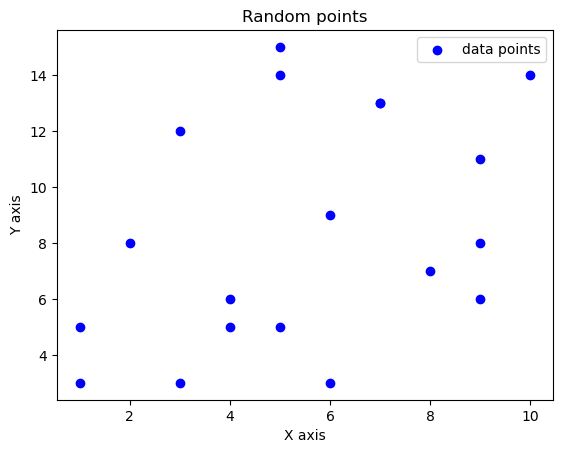

In [26]:
data_points = [(1, 5), (2, 8), (3, 12), (5, 14), (7, 13), (5, 5), (6, 3), (9, 8), (3, 3), (9, 6), (1, 3), (4, 5), (4, 6), (5, 15), (6, 9), (7, 13), (8, 7), (9, 11), (10, 14)]

x_values, y_values = zip(*data_points)

plt.scatter(x_values, y_values, color='blue', marker='o', label='data points')
plt.title('Random points')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.legend()
plt.show()

In [27]:
X = np.array(data_points)
X

array([[ 1,  5],
       [ 2,  8],
       [ 3, 12],
       [ 5, 14],
       [ 7, 13],
       [ 5,  5],
       [ 6,  3],
       [ 9,  8],
       [ 3,  3],
       [ 9,  6],
       [ 1,  3],
       [ 4,  5],
       [ 4,  6],
       [ 5, 15],
       [ 6,  9],
       [ 7, 13],
       [ 8,  7],
       [ 9, 11],
       [10, 14]])

In [28]:
def initial(k, X):
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    return centroids

In [37]:
def Eu_distance(q1, q2):
    return np.sqrt(np.sum((q1-q2)**2))

def cen_distance(cen, X):
    k = len(cen)
    clusters = {i: [] for i in range(k)}

    for point in X:
        distance = [Eu_distance(point, c) for c in cen]
        closest = np.argmin(distance)

        clusters[closest].append(point)

    return clusters

def new_cen(clusters):
    new = []

    for cluster in clusters.values():
        if len(cluster) > 0:
            cen = np.mean(cluster, axis=0)
            new.append(cen)
        else:
            cen.append(np.nan)

    return np.array(new)

In [38]:
k = 3
cen = initial(k, X)

for i in range(100):
    clusters = cen_distance(cen, X)
    cen1 = new_cen(clusters)

    if np.sum(np.abs(cen - cen1)) < 0.1:
        break

    cen = cen1

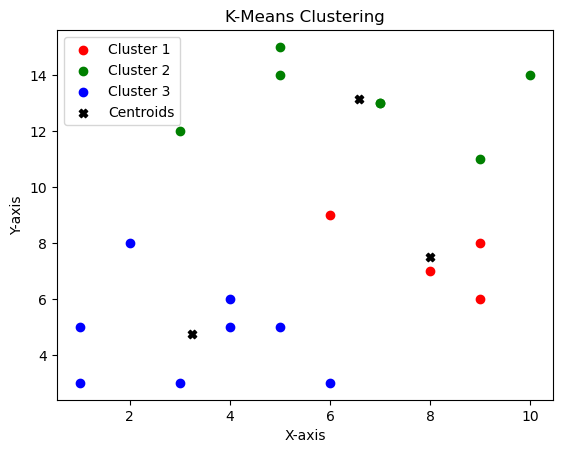

In [42]:
colors = ['r', 'g', 'b']
for i, cluster_points in clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i + 1}')

plt.scatter(cen[:, 0], cen[:, 1], marker='X', color='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()
plt.show()